In [0]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
# read csv
data = pd.read_csv("data/success_params.csv")
print(data.head())

   fitness_gain  fatigue_gain  fitness_decay  fatigue_decay
0      3.940504      4.483752              4              2
1      1.639558      2.797408             16              6
2      1.604018      1.534607             24             21
3      3.351128      3.917639             31             22
4      3.727425      3.631146              5              4


(array([48., 56., 37., 36., 31., 31., 27., 19., 10.,  5.]),
 array([1.00697775, 1.40077615, 1.79457456, 2.18837297, 2.58217137,
        2.97596978, 3.36976819, 3.76356659, 4.157365  , 4.5511634 ,
        4.94496181]),
 <a list of 10 Patch objects>)

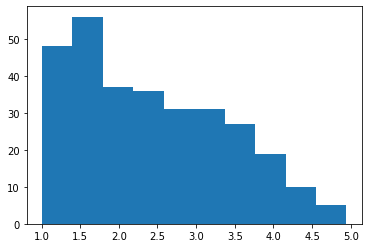

In [4]:
plt.hist(data["fitness_gain"])

(array([  691.,  5774., 15457., 24191., 24660., 17160.,  8459.,  2910.,
          617.,    81.]),
 array([1.0692985 , 1.39361558, 1.71793267, 2.04224975, 2.36656683,
        2.69088392, 3.015201  , 3.33951808, 3.66383516, 3.98815225,
        4.31246933]),
 <a list of 10 Patch objects>)

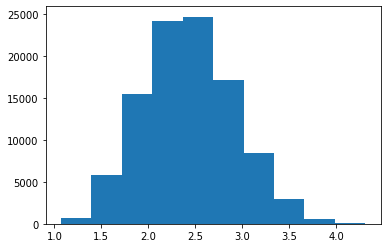

In [24]:
# Central Limit Theorem
sample_size = 100
means = []
for i in range(100000):
  sample = random.sample(data["fitness_gain"].tolist(),4)
  sample_mean = np.mean(sample)
  means.append(sample_mean)
plt.hist(means)
  

In [52]:
# Multivariate CLT
sample_size = 100
means_mv = pd.DataFrame(columns=data.columns)
for i in range(10000):
  sample = data.sample(sample_size)
  sample_mean = sample.mean()
  means_mv = means_mv.append(sample_mean, ignore_index=True)
print(means_mv)

      fitness_gain  fatigue_gain  fitness_decay  fatigue_decay
0         2.425817      3.161263          15.35           7.77
1         2.317144      3.088126          15.43           7.46
2         2.431129      3.313443          16.06           8.50
3         2.468668      3.185313          15.91           8.68
4         2.484151      3.103487          14.69           7.95
...            ...           ...            ...            ...
9995      2.465199      3.334280          16.04           8.51
9996      2.334092      3.342183          17.47           8.65
9997      2.473738      3.257711          13.75           6.83
9998      2.488930      3.304874          13.88           6.70
9999      2.321067      3.283487          15.93           8.26

[10000 rows x 4 columns]


In [101]:

# Create the multi normal distro params
mean = means_mv.mean()
cov = np.cov(means_mv.T)
print(len(mean))
print(len(cov))
# Try sampling
sample = np.random.multivariate_normal(mean, cov)
print(sample)
means_mv.to_csv(r"data/banister_params_dist.csv",index=False)

4
4
[ 2.44008123  3.27032061 13.46354221  6.7210322 ]
